In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.set_option('max_rows', 5)
%matplotlib inline

## t検定
---
母集団分布が正規分布 $\mathcal{N}(\mu,\ \sigma^2)$ の場合、[平均の区間推定](../beginner/interval_estimation.ipynb)と同様に統計量 $
t=\frac
    {{\displaystyle \overline{X} -\mu } }
    {{\displaystyle \sqrt{\frac
        {s^{2}}
        {n}
    }} }
$ が自由度 $n-1$ の $t$ 分布に従うことを利用して検定する。

母集団分布が正規分布でなくても、標本数 $n$ が多く中心極限定理により、平均が正規分布 $
{\displaystyle
    \mathcal{N}\left( \mu ,\ \frac
        {\sigma ^{2}}
        {n}
    \right)
}
$ で近似できる場合には $t$ 検定を利用可能。

###### 練習問題

サンプリングの結果、データセット`a`が得られたとする。母平均が $6$ に等しいかどうかを検定するための統計量 $t$ を求める。ただし、母集団分布は正規分布であると仮定してもよい。

In [2]:
np.random.seed(1234)
a = pd.DataFrame(dict(X=np.random.normal(6.5, 2, 50)))
print('a')
display(a)

a


,X
0,7.442870
1,4.118049
...,...
48,8.010828
49,6.930537


In [3]:
t = (a['X'].mean() - 6) / np.sqrt(a['X'].var(ddof=1) / a.index.size)
t

2.358922572787696

###### 練習問題

この検定に対応する帰無分布 (検定統計量 $t$ が従う分布) の確率密度関数と、上で求めた $t$ 統計量の位置をグラフ表示する。

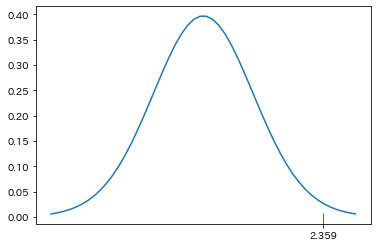

In [4]:
x = np.linspace(-3, 3, 50)
null_dist = stats.t(a.index.size - 1)
plt.plot(x, null_dist.pdf(x))
sns.rugplot([t])
plt.xticks([t])
plt.show()

###### 練習問題

上で求めた検定統計量 $t$ に対応した $p$ 値を求める。

In [5]:
p = null_dist.sf(np.abs(t)) * 2
p

0.022359547151142682

## Pythonでのt検定実行方法
---
`scipy.stats.ttest_1samp`を使用する。  
常に両側検定になるので、片側検定は p 値を $\displaystyle \frac{1}{2}$ にする。

In [6]:
stats.ttest_1samp??

In [7]:
stats.ttest_1samp(a['X'], 6)

Ttest_1sampResult(statistic=2.358922572787696, pvalue=0.022359547151142682)